# <div style="text-align: right;"> رگرسیون: جلسه اول </div>
## <div style="text-align: right"> دانشجو : مجتبی فتحی </div>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

**<div style="text-align: right"> نوع کلیدهای دیتاست را مشخص می کند این پرامتر اجباری نیست </div>**


In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

**<div style="text-align: right"> دیتاست را بااستفاده از کتابخانه پاندا می خوانیم </div>**


In [3]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict)

**<div style="text-align: right"> تابع زیر با گرفتن پارامترهای ( ویژگی انتخاب شده و خروجی این ویژگی) شیب خط و عرض از مبدا را محاسبه می کند  </div>**


In [4]:
def simple_linear_regression(input_feature,output):
    n = input_feature.size
    x = input_feature
    y = output
    
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

**<div style="text-align: right">تابع زیر با گرفتن ویژگی(متراژ خانه) قیمت خانه را پیش بینی میکند   </div>**


In [5]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + (slope * input_feature)
    return predicted_values

**<div style="text-align: right">  تابع زیر بررسی میکند که با شیب خط و عرض مبدا بدست آمده به چه میزان پیش بینی درست است . بهترین حالت مقدار صفر می باشد و هر چه قدر مقدار افزایش یابد دلیل بر خوب عمل نکردن مدل است.  </div>**


In [6]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
#     predicted_values = intercept + (slope * input_feature)
    predicted_values = get_regression_predictions(input_feature, intercept, slope)
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values
    # square the residuals and add them up
    RSS = (residuals ** 2).sum()
    return(RSS)

**<div style="text-align: right">    با استفاده از تابع زیر نمودار پراکندگی داده ها و معادله خط  رسم می شود   </div>**


In [7]:
def plot_regression_line(x, y, intercept, slope, xlabel='x', ylabel='y'): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
    
        # predicted response vector 
    y_pred = get_regression_predictions(x, intercept, slope)
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel(xlabel) 
    plt.ylabel(ylabel) 
  
    # function to show plot 
    plt.show() 

**<div style="text-align: right">برای اینکه مشخص کنیم توابع نوشته شده درست کار می کنند یا نه  ؟ یک آرایه ۵ اندیسی ایجاد میکنیم سپس یک آرایه دیگه به عنوان خروجی ایجاد میکنیم که طبق قرمول معادله خط شیب و عرض از مبدا آن ۱ می باشد. حال تابع رگرسیون خطی ساده را فراخوانی می کنیم تا برای ما شیب خط و عرض از مبدا را بدست بیاورد. 
    در صورتی که نتایج مقدار یک را نشان دهد این تابع درست عکل کرده است </div>**


Intercept: 1.0
Slope: 1.0
RSS: 0.0


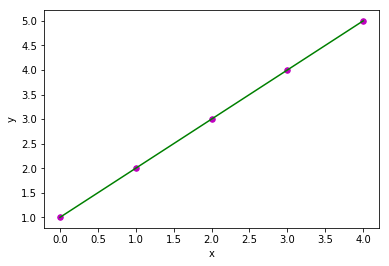

In [8]:
test_feature = np.array(range(5))
test_output = np.array(1 + 1*test_feature)
(test_intercept, test_slope) =  simple_linear_regression(test_feature, test_output)
print ("Intercept: " + str(test_intercept))
print ("Slope: " + str(test_slope))
print ("RSS: " + str(get_residual_sum_of_squares(test_feature, test_output, test_intercept, test_slope)))
plot_regression_line(test_feature,  test_output, test_intercept, test_slope)

**<div style="text-align: right">   و شیب خط و عرض از مبدا بدست آمده است RSS   </div>**


Intercept: -47116.07907289418
Slope: 281.9588396303426
The RSS of predicting Prices based on Square Feet is : 1201918354177283.0


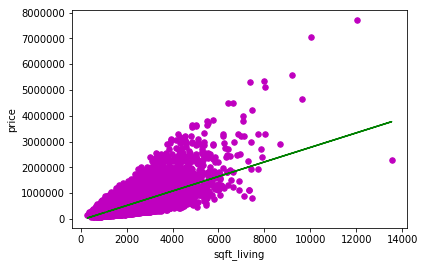

In [9]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'].values, train_data['price'].values)
print ("Intercept: " + str(sqft_intercept))
print ("Slope: " + str(sqft_slope))
rss_prices_on_sqft = get_residual_sum_of_squares(train_data['sqft_living'].values, train_data['price'].values,
                                                 sqft_intercept, sqft_slope)
print ('The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft))

plot_regression_line(train_data['sqft_living'].values, train_data['price'].values, sqft_intercept, 
                     sqft_slope,"sqft_living","price")

**<div style="text-align: right">  در تابع زیر به صورت تدریجی از داده های آموزشی برای پیدا کردن شیب خط و عرض از مبدا استفاده میکنیم.  </div>**


In [10]:
def gradual_training(input_feature,output):
    
    RSS = []
    i = .25
    while i <= 1:     
        new_list_input = input_feature[int(len(input_feature)*.00):int(len(input_feature)*i)]
        new_list_output = output[int(len(output)*.00):int(len(output)*i)]
        intercept, slope = simple_linear_regression(new_list_input, new_list_output) 
        rss = get_residual_sum_of_squares(new_list_input, new_list_output,intercept,slope)
        i += .25
        print({'intercept':intercept, 'slope':slope, 'rss':rss})
        
        plot_regression_line(new_list_input, new_list_output, intercept, slope,"sqft_living","price")

{'intercept': -73963.10768802313, 'slope': 296.26253934741254, 'rss': 341700390810295.56}


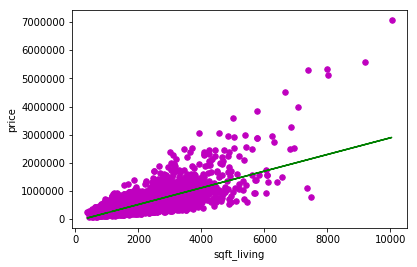

{'intercept': -62828.97572073073, 'slope': 289.4349437745284, 'rss': 623529255418299.9}


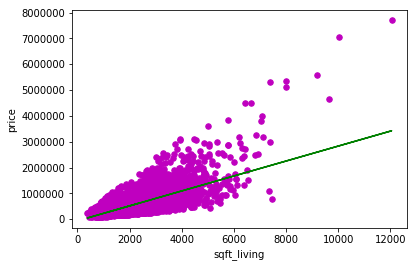

{'intercept': -52672.935327157145, 'slope': 285.1460929115245, 'rss': 896814476311161.8}


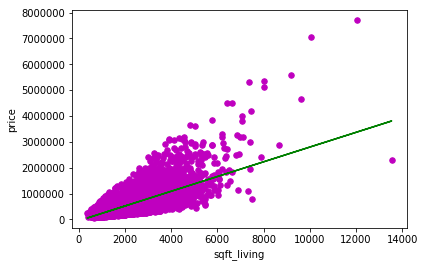

{'intercept': -47116.07907289418, 'slope': 281.9588396303426, 'rss': 1201918354177283.0}


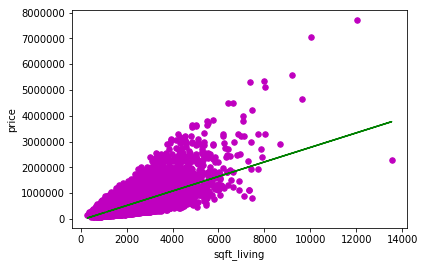

In [13]:
gradual_training(train_data['sqft_living'].values, train_data['price'].values)